Nama = Anas Fikri Hanif\
SIB ID = M183X0321

**Import Library**

In [38]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Menyiapkan Dataset**

In [ ]:
df = pd.read_csv('vgsales.csv')

In [ ]:
# membuang kolom yang tidak perlu
df = df.drop(columns=['Rank', 'Platform', 'Year', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

In [ ]:
df.head(20)

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,Role-Playing
5,Tetris,Puzzle
6,New Super Mario Bros.,Platform
7,Wii Play,Misc
8,New Super Mario Bros. Wii,Platform
9,Duck Hunt,Shooter


In [ ]:
# melakukan one-hot-encoding untuk mengatasi label bertipe categorical
category = pd.get_dummies(df.Genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['Genre'])
df_baru

,Name,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,0,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,0,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,0,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,0,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0,0,0,0,1,0,0,0,0,0,0,0
16594,Men in Black II: Alien Escape,0,0,0,0,0,0,0,0,1,0,0,0
16595,SCORE International Baja 1000: The Official Game,0,0,0,0,0,0,1,0,0,0,0,0
16596,Know How 2,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
nama = df_baru['Name'].values
label = df_baru[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']].values

**Splitting Data Menjadi Training dan Testing**

In [ ]:
# alokasi data testing 20%

nama_latih, nama_test, label_latih, label_test = train_test_split(nama, label, test_size=0.2)

**Tokenizer dan Sequence**

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(nama_latih)
tokenizer.fit_on_texts(nama_test)

sekuens_latih = tokenizer.texts_to_sequences(nama_latih)
sekuens_test = tokenizer.texts_to_sequences(nama_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

**Pembuatan Model**

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**Pembuatan Callbacks**

In [43]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print('\nAkurasi telah mencapai 91% !')
      self.model.stop_training = True
callbacks = myCallbacks()

**Fitting Model**

In [44]:
num_epoch = 50
history = model.fit(
    padded_latih,
    label_latih,
    epochs = num_epoch,
    validation_data = (padded_test, label_test),
    verbose = 2,
    callbacks = [callbacks])

Epoch 1/50
415/415 - 7s - loss: 2.1719 - accuracy: 0.2581 - val_loss: 1.8275 - val_accuracy: 0.3877 - 7s/epoch - 18ms/step
Epoch 2/50
415/415 - 5s - loss: 1.5312 - accuracy: 0.4776 - val_loss: 1.4105 - val_accuracy: 0.5196 - 5s/epoch - 12ms/step
Epoch 3/50
415/415 - 5s - loss: 1.1850 - accuracy: 0.6088 - val_loss: 1.2631 - val_accuracy: 0.6054 - 5s/epoch - 11ms/step
Epoch 4/50
415/415 - 5s - loss: 0.9660 - accuracy: 0.6970 - val_loss: 1.1912 - val_accuracy: 0.6566 - 5s/epoch - 11ms/step
Epoch 5/50
415/415 - 5s - loss: 0.7923 - accuracy: 0.7645 - val_loss: 1.1063 - val_accuracy: 0.6934 - 5s/epoch - 11ms/step
Epoch 6/50
415/415 - 5s - loss: 0.6760 - accuracy: 0.7991 - val_loss: 1.0953 - val_accuracy: 0.7066 - 5s/epoch - 11ms/step
Epoch 7/50
415/415 - 5s - loss: 0.6042 - accuracy: 0.8200 - val_loss: 1.0862 - val_accuracy: 0.7238 - 5s/epoch - 11ms/step
Epoch 8/50
415/415 - 5s - loss: 0.5504 - accuracy: 0.8352 - val_loss: 1.0922 - val_accuracy: 0.7232 - 5s/epoch - 11ms/step
Epoch 9/50
415/4

**Plot Accuracy dan Loss saat Testing dan Training**

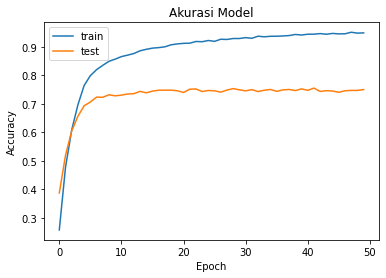

In [45]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

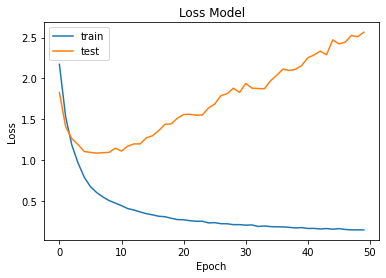

In [46]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()